In [159]:
from scipy import stats
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [161]:

# Load the dataset
df = pd.read_csv('CASE1201.ASC.txt', sep='\\s+')
df.head()


,state,sat,takers,income,years,public,expend,rank
0,Iowa,1088,3,326,16.79,87.8,25.60,89.7
1,SouthDakota,1075,2,264,16.07,86.2,19.95,90.6
2,NorthDakota,1068,3,317,16.57,88.3,20.62,89.8
3,Kansas,1045,5,338,16.30,83.9,27.14,86.3
4,Nebraska,1045,5,293,17.25,83.6,21.05,88.5


### Task 1: Display the correlation and covariance tables for the raw features

In [164]:

# Correlation and Covariance (Using only numeric columns)
correlation_table = df.corr(numeric_only = True)
covariance_table = df.cov(numeric_only = True)

print("Correlation Table:")
print(correlation_table)
print("\nCovariance Table:")
print(covariance_table)

Correlation Table:
             sat    takers    income     years    public    expend      rank
sat     1.000000 -0.857810  0.584467  0.330969 -0.080357 -0.062878  0.879909
takers -0.857810  1.000000 -0.661935 -0.101544  0.123556  0.283630 -0.942833
income  0.584467 -0.661935  1.000000  0.134762 -0.306567  0.131519  0.532700
years   0.330969 -0.101544  0.134762  1.000000 -0.417118  0.059829  0.070224
public -0.080357  0.123556 -0.306567 -0.417118  1.000000  0.284591  0.050624
expend -0.062878  0.283630  0.131519  0.059829  0.284591  1.000000 -0.264969
rank    0.879909 -0.942833  0.532700  0.070224  0.050624 -0.264969  1.000000

Covariance Table:
                sat       takers       income      years      public  \
sat     5020.628980 -1338.557959  1809.468163  16.415461  -55.975265   
takers -1338.557959   484.991429  -636.934286  -1.565331   26.750122   
income  1809.468163  -636.934286  1909.081224   4.121616 -131.683592   
years     16.415461    -1.565331     4.121616   0.489975  

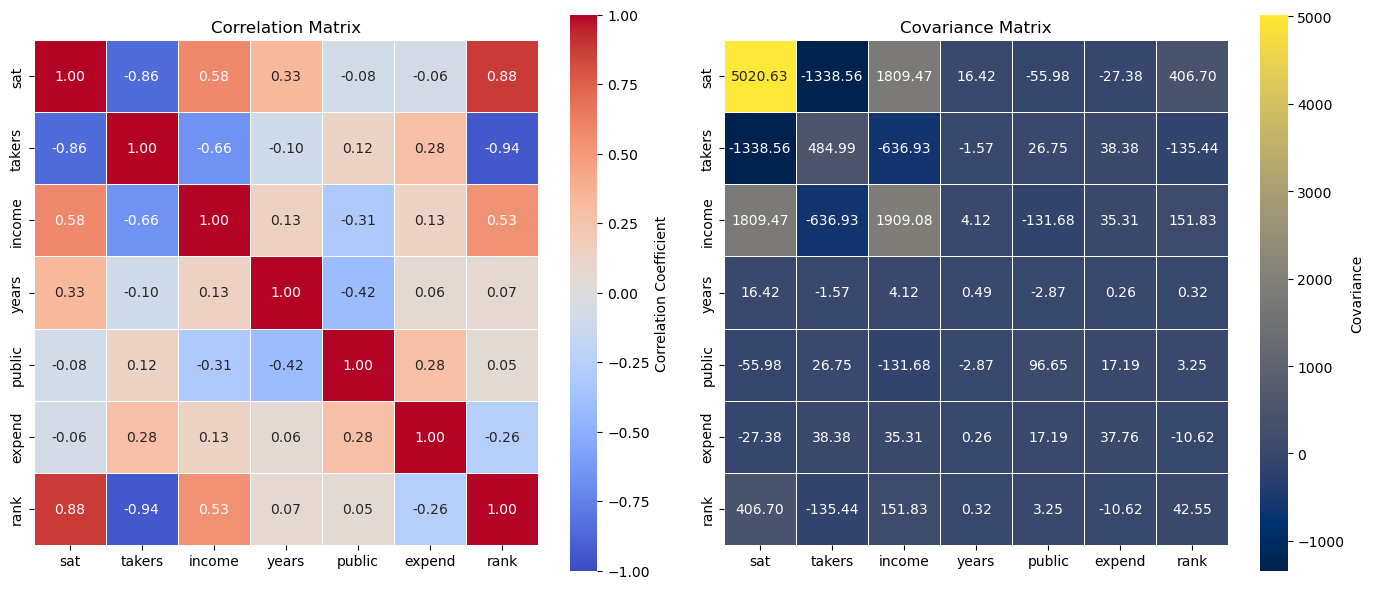

In [166]:
# Heatmaps for correlation and covarience matrices
# Set up the figure size
plt.figure(figsize=(14, 6))

# Plot correlation heatmap
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.heatmap(correlation_table, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar_kws={'label': 'Correlation Coefficient'}, linewidths=0.5, vmin=-1, vmax=1,square=True )
plt.title("Correlation Matrix")

# Plot covariance heatmap
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.heatmap(covariance_table, annot=True, fmt=".2f", cmap="cividis", 
            cbar_kws={'label': 'Covariance'}, linewidths=0.5, square=True)
plt.title("Covariance Matrix")

# Adjust layout
plt.tight_layout()
plt.show()

### Task 2: Build a: (a) simple (intercept + takers) and (b) full linear regression model to predict the SAT scores

In [169]:
y_pred_simple = df.iloc[:, 1].values.reshape(-1,1)
y_pred_full = df.iloc[: , 1] 

In [171]:
x_pred_simple = sm.add_constant(df.iloc[:,2].values)
foo=pd.DataFrame(x_pred_simple )
foo.head()

,0,1
0,1.0,3.0
1,1.0,2.0
2,1.0,3.0
3,1.0,5.0
4,1.0,5.0


In [173]:
x_pred_full = sm.add_constant(df.iloc[:, 2:].values)
x_pred_full[:10]

array([[  1.  ,   3.  , 326.  ,  16.79,  87.8 ,  25.6 ,  89.7 ],
       [  1.  ,   2.  , 264.  ,  16.07,  86.2 ,  19.95,  90.6 ],
       [  1.  ,   3.  , 317.  ,  16.57,  88.3 ,  20.62,  89.8 ],
       [  1.  ,   5.  , 338.  ,  16.3 ,  83.9 ,  27.14,  86.3 ],
       [  1.  ,   5.  , 293.  ,  17.25,  83.6 ,  21.05,  88.5 ],
       [  1.  ,   8.  , 263.  ,  15.91,  93.7 ,  29.48,  86.4 ],
       [  1.  ,   7.  , 343.  ,  17.41,  78.3 ,  24.84,  83.4 ],
       [  1.  ,   4.  , 333.  ,  16.57,  75.2 ,  17.42,  85.9 ],
       [  1.  ,   5.  , 328.  ,  16.01,  97.  ,  25.96,  87.5 ],
       [  1.  ,  10.  , 304.  ,  16.85,  77.3 ,  27.69,  84.2 ]])

In [175]:
# Simple (intercept + takers) linear regression model
simple_model = sm.OLS(y_pred_full, x_pred_simple).fit()
simple_model.summary(xname=['intercept','takers'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sat   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     133.7
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           1.77e-15
Time:                        17:15:08   Log-Likelihood:                -250.19
No. Observations:                  50   AIC:                             504.4
Df Residuals:                      48   BIC:                             508.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1020.3062      8.139    125.359      0.000    1003.941    1036.671
takers        -2.7600      0.239    -11.563      0.000      -3.240      -2.280
==============================================================================
Omnibus:                        0.370   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.144
Skew:                          -0.131   Prob(JB):                        0.931
Kurtosis:                       3.011   Cond. No.                         53.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
#variance of the model
print(f'Simple Model Variance: {simple_model.mse_resid}\n')

Simple Model Variance: 1353.8901619553135



In [179]:
# Full linear regression model to predict the SAT scores 
full_model = sm.OLS(y_pred_simple, x_pred_full).fit()
full_model.summary(xname=['intercept','takers', 'income', 'years', 'public','expend','rank'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     51.91
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           4.16e-18
Time:                        17:15:10   Log-Likelihood:                -230.74
No. Observations:                  50   AIC:                             475.5
Df Residuals:                      43   BIC:                             488.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -94.6591    211.510     -0.448      0.657    -521.209     331.891
takers        -0.4801      0.694     -0.692      0.493      -1.879       0.919
income        -0.0082      0.152     -0.054      0.957      -0.315       0.299
years         22.6101      6.315      3.581      0.001       9.876      35.345
public        -0.4642      0.579     -0.802      0.427      -1.632       0.704
expend         2.2120      0.846      2.615      0.012       0.506       3.918
rank           8.4762      2.108      4.021      0.000       4.225      12.727
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.957
Skew:                          -0.591   Prob(JB):                        0.228
Kurtosis:                       3.152   Cond. No.                     1.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
#variance of the model
print(f'Full Model Variance: {full_model.mse_resid}')

Full Model Variance: 694.009681163574


### Task 3: Choose at least one method from each of the three feature selection techniques (filter, wrapper,and embedded). Select and report the “best” features using these three methods.

In [184]:
# Feature Selection
X_full = df.drop(columns=['sat', 'state'])
y = df['sat']
# Filter Method: Using ANOVA F-test for feature selection
filter_selector = SelectKBest(score_func=f_regression, k=3)
filter_selector.fit(X_full, y)
filter_scores = pd.DataFrame({"Feature": X_full.columns, "Score": filter_selector.scores_})
filter_selected_features = filter_scores.loc[filter_selector.get_support()]
print("\nSelected Features (ANOVA F-test):")
print(filter_selected_features["Feature"].tolist())

# Wrapper Method: Recursive Feature Elimination (RFE)
wrapper_selector = RFE(estimator=LinearRegression(), n_features_to_select=3)
wrapper_selector.fit(X_full, y)
wrapper_ranking = pd.DataFrame({"Feature": X_full.columns, "Rank": wrapper_selector.ranking_})
selected_features = X_full.columns[wrapper_selector.get_support()]
print("\nSelected Features (Wrapper Method - RFE):")
print(selected_features.tolist())


# Embedded Method: Feature importance from Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_full, y)
lasso_importances = pd.DataFrame({"Feature": X_full.columns, "Importance": lasso.coef_})
embedded_selected_features = lasso_importances[lasso_importances["Importance"] != 0]
print("\nSelected Features (Lasso):")
print(embedded_selected_features["Feature"].tolist())



Selected Features (ANOVA F-test):
['takers', 'income', 'rank']

Selected Features (Wrapper Method - RFE):
['years', 'expend', 'rank']

Selected Features (Lasso):
['takers', 'income', 'years', 'public', 'expend', 'rank']


### Task 4: Did you expect to see any differences between the “best features” in the different models you chose? Do you see any significant differences?

### Task 5: Calculate the Principal Components for the same data set: (a) Normalize the data, (b) display correlation and covariance tables fort the normalized data, build the PCA following the in-class model, and finally display the explained variance for all the principal components.

In [188]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Compute correlation and covariance for normalized data
norm_corr = pd.DataFrame(X_scaled, columns=X_full.columns).corr()
norm_cov = pd.DataFrame(X_scaled, columns=X_full.columns).cov()

# Display the correlation and covariance matrices
print('Normalized Correlation Matrix:')
display(norm_corr)
print('\nNormalized Covariance Matrix:')
display(norm_cov)

Normalized Correlation Matrix:


,takers,income,years,public,expend,rank
takers,1.000000,-0.661935,-0.101544,0.123556,0.283630,-0.942833
income,-0.661935,1.000000,0.134762,-0.306567,0.131519,0.532700
years,-0.101544,0.134762,1.000000,-0.417118,0.059829,0.070224
public,0.123556,-0.306567,-0.417118,1.000000,0.284591,0.050624
expend,0.283630,0.131519,0.059829,0.284591,1.000000,-0.264969
rank,-0.942833,0.532700,0.070224,0.050624,-0.264969,1.000000



Normalized Covariance Matrix:


,takers,income,years,public,expend,rank
takers,1.020408,-0.675444,-0.103616,0.126078,0.289419,-0.962075
income,-0.675444,1.020408,0.137513,-0.312823,0.134203,0.543571
years,-0.103616,0.137513,1.020408,-0.425631,0.061050,0.071657
public,0.126078,-0.312823,-0.425631,1.020408,0.290399,0.051657
expend,0.289419,0.134203,0.061050,0.290399,1.020408,-0.270376
rank,-0.962075,0.543571,0.071657,0.051657,-0.270376,1.020408


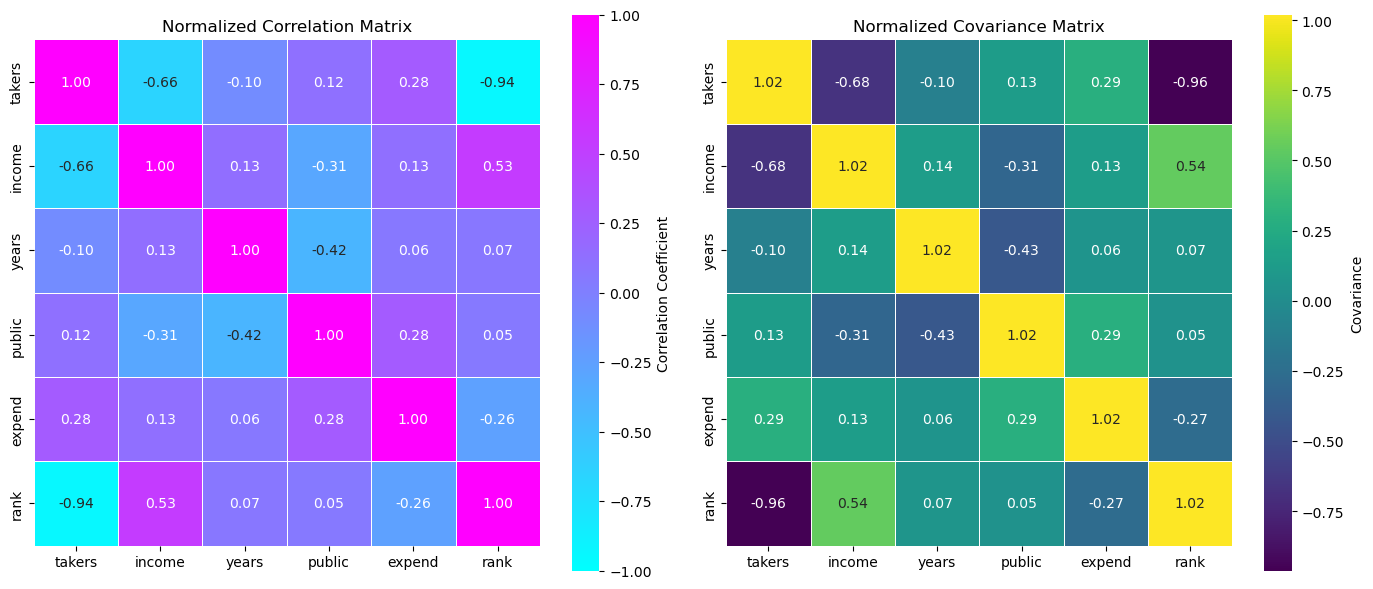

In [190]:
# Set up the figure size (for side-by-side display)
plt.figure(figsize=(14, 6))

# Plot Correlation Heatmap with a color map (e.g., coolwarm)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.heatmap(norm_corr, annot=True, fmt=".2f", cmap="cool", 
            cbar_kws={'label': 'Correlation Coefficient'}, linewidths=0.5, vmin=-1, vmax=1, square=True)
plt.title("Normalized Correlation Matrix")

# Plot Covariance Heatmap with a different color map (e.g., YlGnBu)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.heatmap(norm_cov, annot=True, fmt=".2f", cmap="viridis", 
            cbar_kws={'label': 'Covariance'}, linewidths=0.5, square=True)
plt.title("Normalized Covariance Matrix")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


Explained Variance Ratio:
Principal Component 1: 0.4274
Principal Component 2: 0.2348
Principal Component 3: 0.1917
Principal Component 4: 0.1120
Principal Component 5: 0.0284
Principal Component 6: 0.0057




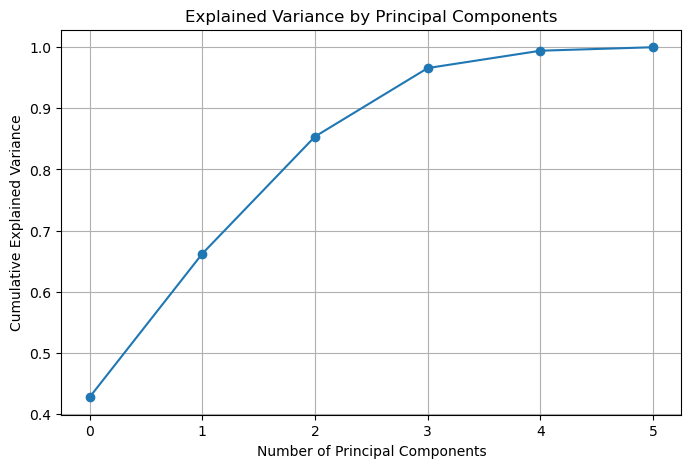

In [192]:
# Calculate PCA
pca = PCA()
pca.fit(X_scaled)

# Get explained variance
explained_variance = pca.explained_variance_ratio_

# Display the explained variance for each principal component
print("\nExplained Variance Ratio:")
for i, var in enumerate(explained_variance, 1):
    print(f"Principal Component {i}: {var:.4f}")
print("\n")

# Plot the explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

### Task 6: In your opinion, what is the “best” number of Principal Components to use? 